# **Basic Image Enhancement Using Mathematical Operations**

Image Processing techniques take advantage of mathematical operations to achieve different results.

>Arithmetic Operations like addition, multiplication, 
>Thresholding & Masking
>Bitwise Operations like OR, AND, XOR



In [45]:
# Importing Libraries
import os
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

from zipfile import ZipFile
from urllib.request import urlretrieve 

from IPython.display import Image 
%matplotlib inline 

# **Download Assets**



In [46]:
def download_and_unzip(url,save_path):
    print(f"Downloading and extracting assets.....",end="")

    # Downloading zip file using urllib 
    urlretrieve(url,save_path)

    try:
        # Extracting zipfile using the zipfile package.
        with ZipFile(save_path) as z:
            # Extarct ZIP file using teh zipfile package
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\n Invalid File",e)

In [47]:
URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB4.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)  

# **Original Image**

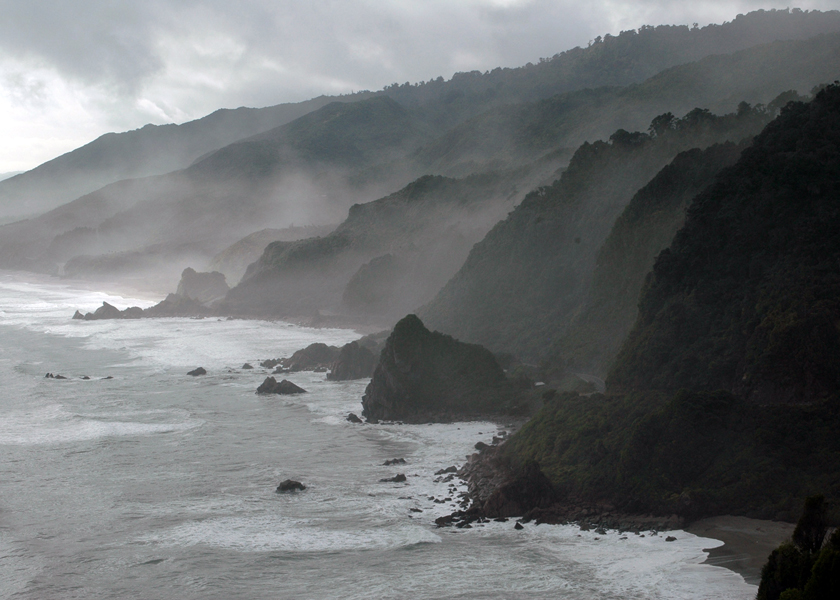

In [48]:
img_bgr=cv2.imread("New_Zealand_Coast.jpg",cv2.IMREAD_COLOR)
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

# Display 18x18 pixel image
Image(filename="New_Zealand_Coast.jpg")

# **Addition or Brightness**

The first operation we discuss is simple addition of images. This results in increasing or decreasing the brightness of the image since we are eventually increasing or decreasing the intensity values of each pixel by the same amount. So, this will result in a global increase/decrease in brightness.


Text(0.5, 1.0, 'Brighter')

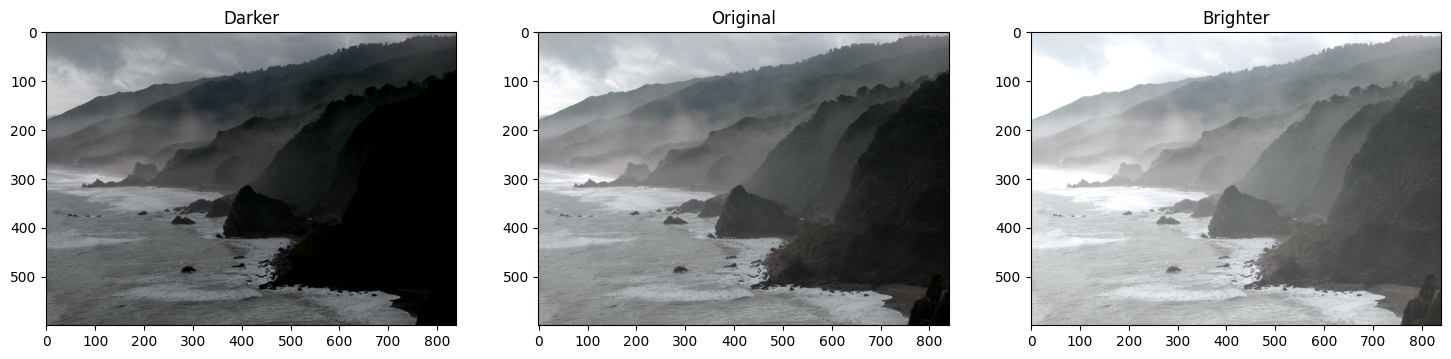

In [49]:
matrix=np.ones(img_rgb.shape,dtype="uint8")*50

img_rgb_brighter=cv2.add(img_rgb,matrix)
img_rgb_darker=cv2.subtract(img_rgb,matrix)

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131);plt.imshow(img_rgb_darker);plt.title("Darker")
plt.subplot(132);plt.imshow(img_rgb);plt.title("Original")
plt.subplot(133);plt.imshow(img_rgb_brighter);plt.title("Brighter")

# **Multiplication or Contrast**

Just like addition can result in brightness change, multiplication can be used to improve the contrast of the image.

Contrast is the difference in the intensity values of the pixels of an image. Multiplying the intensity values with a constant can make the difference larger or smaller ( if multiplying factor is < 1 ).

Text(0.5, 1.0, 'Higher Contrast')

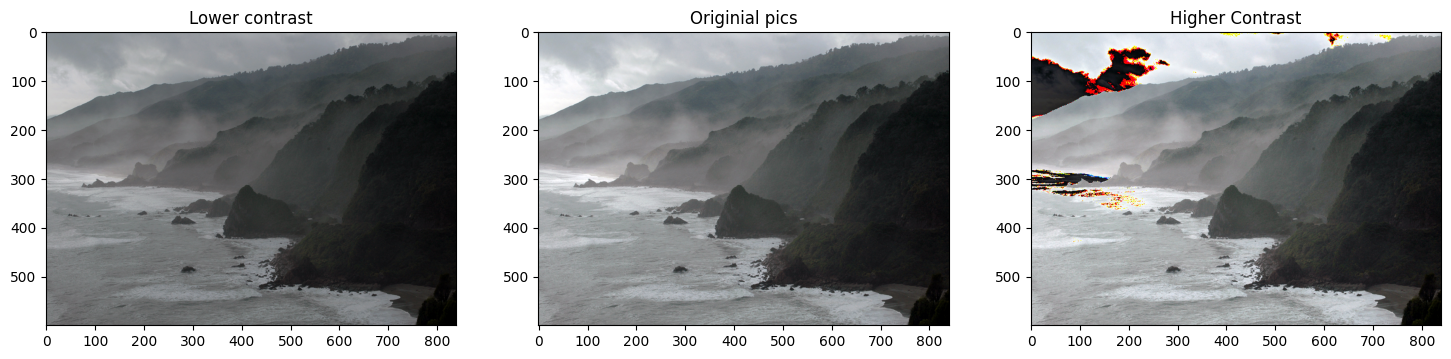

In [50]:
matrix1=np.ones(img_rgb.shape)*0.8
matrix2=np.ones(img_rgb.shape)*1.2

img_rgb_darker=np.uint8(cv2.multiply(np.float64(img_rgb),matrix1))
img_rgb_brighter=np.uint8(cv2.multiply(np.float64(img_rgb),matrix2))

# Sgow Images
plt.figure(figsize=[18,5])
plt.subplot(131);plt.imshow(img_rgb_darker);plt.title("Lower contrast")
plt.subplot(132);plt.imshow(img_rgb);plt.title("Originial pics")
plt.subplot(133);plt.imshow(img_rgb_brighter);plt.title("Higher Contrast")

**Fixing Overflow issue**:
The issue is that after multiplying, the values which are already high, are becoming greater than 255. Thus, the overflow issue.

**Handling Overlow using np.clip**

Text(0.5, 1.0, 'Higher Contrast')

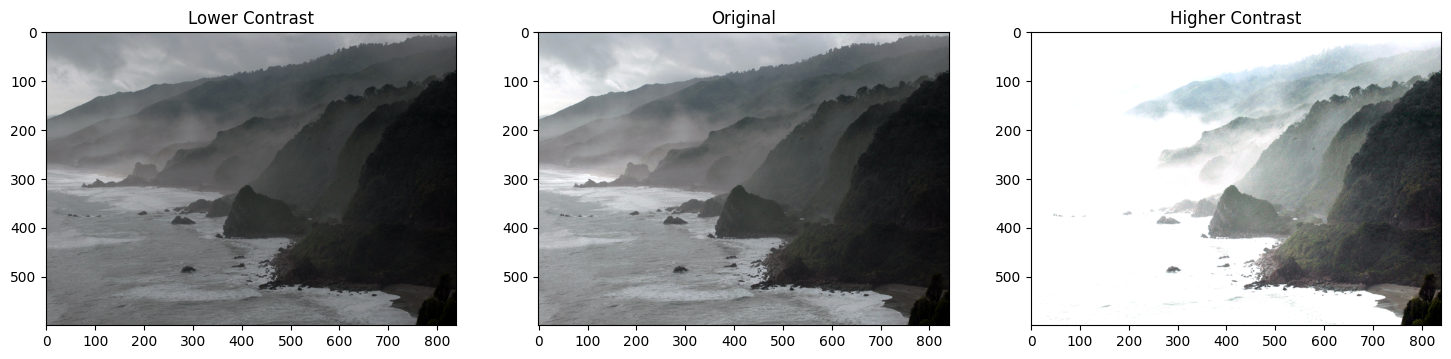

In [51]:
matrix1=np.ones(img_rgb.shape)*0.8
matrix2=np.ones(img_rgb.shape)*2.2

img_rgb_lower=np.uint8(cv2.multiply(np.float64(img_rgb),matrix1))
img_rgb_higher=np.uint8(np.clip(cv2.multiply(np.float64(img_rgb),matrix2),0,255))

# Show images
plt.figure(figsize=[18,5])
plt.subplot(131);plt.imshow(img_rgb_lower);plt.title("Lower Contrast")
plt.subplot(132);plt.imshow(img_rgb);plt.title("Original")
plt.subplot(133);plt.imshow(img_rgb_higher);plt.title("Higher Contrast")


# **Image Thresholding**

Binary Images have a lot of use cases in Image Processing. One of the most common use cases is that of creating masks. Image Masks allow us to process on specific parts of an image keeping the other parts intact. Image Thresholding is used to create Binary Images from grayscale images. You can use different thresholds to create different binary images from the same original image.

Function Syntax

**retval, dst = cv2.threshold( src, thresh, maxval, type[, dst] )**

dst: The output array of the same size and type and the same number of channels as src.

The function has 4 required arguments:

1.**src:** input array (multiple-channel, 8-bit or 32-bit floating point).

2.**thresh:** threshold value.

3.**maxval:** maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.

4.**type:** thresholding type (see ThresholdTypes).

Function Syntax

**dst = cv.adaptiveThreshold( src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst] )**

dst Destination image of the same size and the same type as src.

The function has 6 required arguments:

1.**src:** Source 8-bit single-channel image.

2.**maxValue:** Non-zero value assigned to the pixels for which the condition is satisfied

3.**adaptiveMethod:** Adaptive thresholding algorithm to use, see AdaptiveThresholdTypes. The BORDER_REPLICATE | BORDER_ISOLATED is used to process boundaries.

4.**thresholdType:** Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV, see ThresholdTypes.

5.**blockSize:** Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.

6.**C:** Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.


| Type              | Output   | Common Use            | Visual Intution       |
| ----------------- | -------- | --------------------- | --------------------- |
| THRESH_BINARY     | 0 or 255 | Masking, segmentation | ON/OFF Switch         |
| THRESH_BINARY_INV | 255 or 0 | Inverse masking       | Reverse Switch        |
| THRESH_TRUNC      | 0–thresh | Contrast control      | Ceiling Limit         |
| THRESH_TOZERO     | Partial  | Highlight filtering   | Delete Dark           |
| THRESH_TOZERO_INV | Partial  | Shadow filtering      | Delete Bright         |




(572, 800)


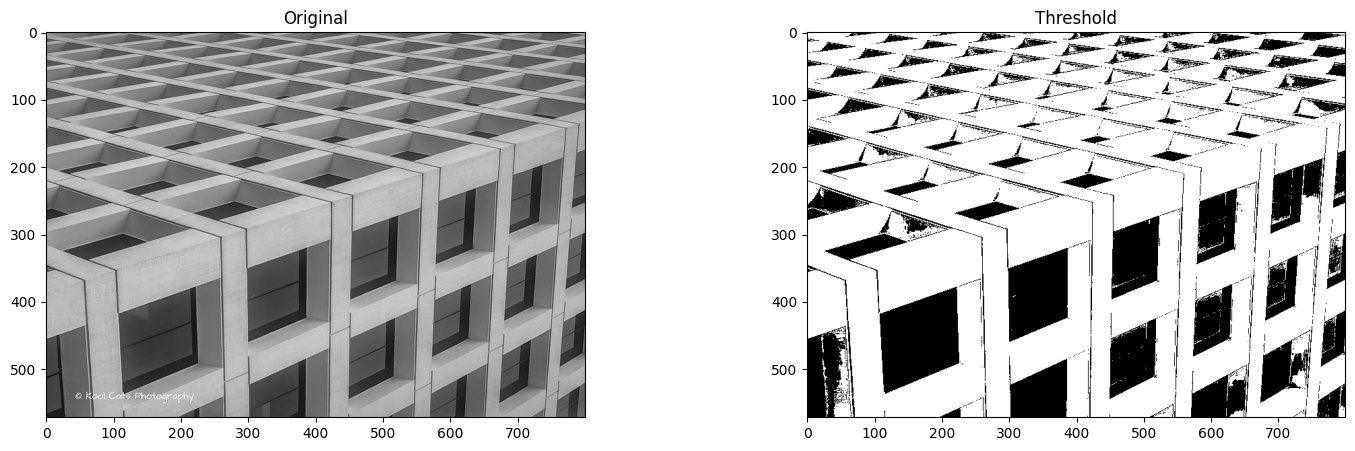

In [52]:
img_read=cv2.imread("building-windows.jpg",cv2.IMREAD_GRAYSCALE)
retval,img_thresh=cv2.threshold(img_read,100,225,cv2.THRESH_BINARY)

# Show the images
plt.figure(figsize=[18,5])

plt.subplot(121);plt.imshow(img_read,cmap="gray");plt.title("Original")
plt.subplot(122);plt.imshow(img_thresh,cmap="gray");plt.title("Threshold")

print(img_thresh.shape)

# **Application: Sheet Music Reader**

Suppose you wanted to build an application that could read (decode) sheet music. This is similar to Optical Character Recognigition (OCR) for text documents where the goal is to recognize text characters. In either application, one of the first steps in the processing pipeline is to isolate the important information in the image of a document (separating it from the background). This task can be accomplished with thresholding techniques. Let's take a look at an example.

Text(0.5, 1.0, 'Threshold (Adaptive)')

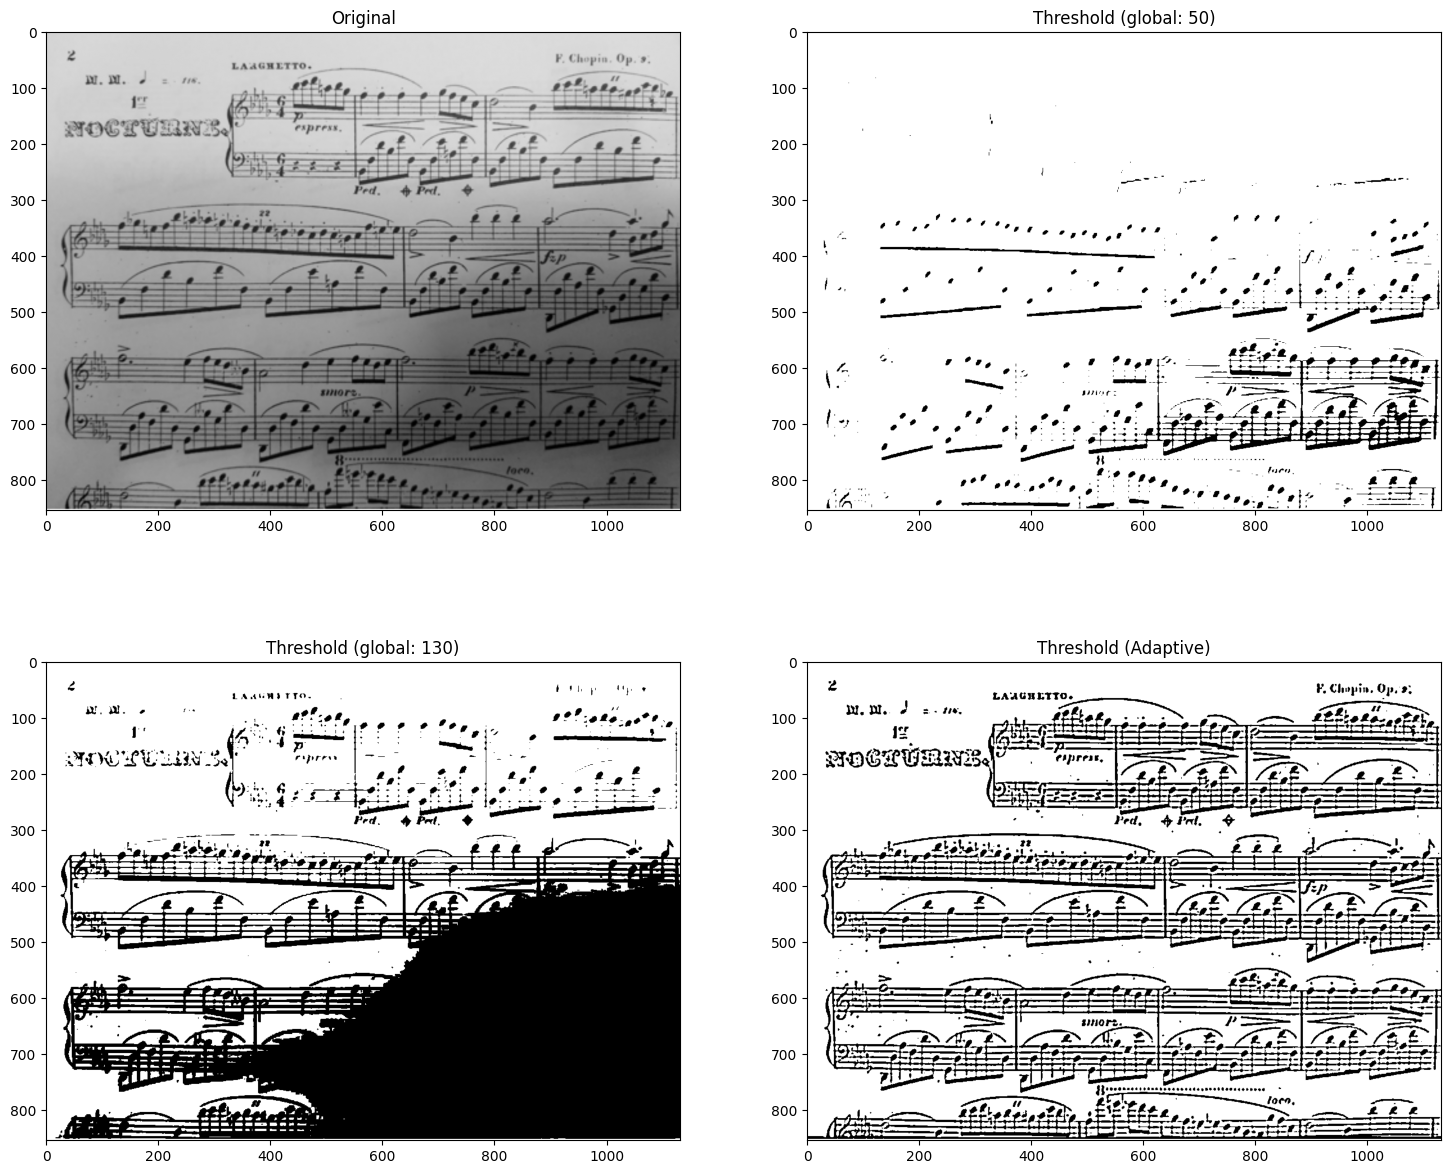

In [53]:
# Read the original image 

img_read=cv2.imread("Piano_Sheet_Music.png",cv2.IMREAD_GRAYSCALE)

# Perform global thresholding 
retval,img_thresh_gbl_1=cv2.threshold(img_read,50,255,cv2.THRESH_BINARY)

# Perform global thresholding
retval, img_thresh_gbl_2=cv2.threshold(img_read,130,255,cv2.THRESH_BINARY)

# Perform adaptive thresholding
img_thresh_adp=cv2.adaptiveThreshold(img_read,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,7)

# Show images
plt.figure(figsize=[18,15])
plt.subplot(221);plt.imshow(img_read,cmap="gray");plt.title("Original")
plt.subplot(222);plt.imshow(img_thresh_gbl_1,cmap="gray");plt.title("Threshold (global: 50)")
plt.subplot(223);plt.imshow(img_thresh_gbl_2,cmap="gray");plt.title("Threshold (global: 130)")
plt.subplot(224);plt.imshow(img_thresh_adp,cmap="gray");plt.title("Threshold (Adaptive)")

| Global Thresholding                 | Adaptive Thresholding             |
| ----------------------------------- | --------------------------------- |
| Single threshold for entire image   | Different threshold per region    |
| Sensitive to lighting               | Works well with uneven lighting   |
| Simple & fast                       | More accurate                     |
| Less suitable for real-world images | Ideal for documents, text, sheets |


# **Bitwise Operations**

**Function Syntax**

Example API for **cv2.bitwise_and()**. Others include: cv2.bitwise_or(), cv2.bitwise_xor(), cv2.bitwise_not()

**dst = cv2.bitwise_and( src1, src2[, dst[, mask]] )**

**dst:** Output array that has the same size and type as the input arrays.

The function has 2 required arguments:

**src1:** first input array or a scalar.

**src2:** second input array or a scalar.

An important optional argument is:

**mask:** optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.


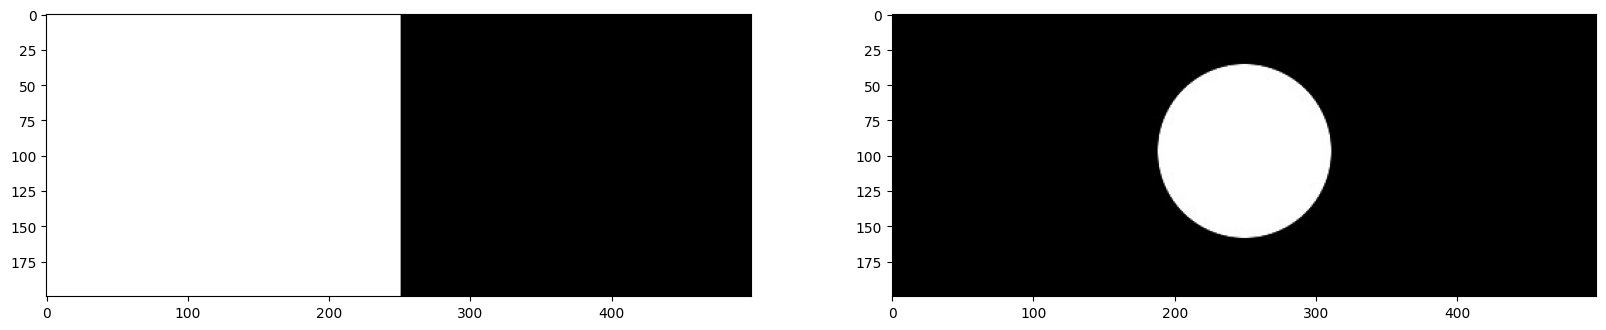

In [54]:
img_rec=cv2.imread("rectangle.jpg",cv2.IMREAD_GRAYSCALE)

img_cir=cv2.imread("circle.jpg",cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20,5])
plt.subplot(121);plt.imshow(img_rec,cmap="gray")
plt.subplot(122);plt.imshow(img_cir,cmap="gray")

**Bitwise AND Operator**

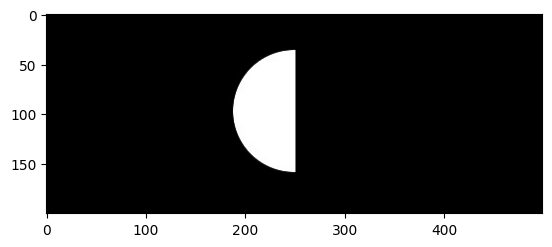

In [55]:
result=cv2.bitwise_and(img_rec,img_cir,mask=None)
plt.imshow(result,cmap="gray")

**Bitwise OR Operator**

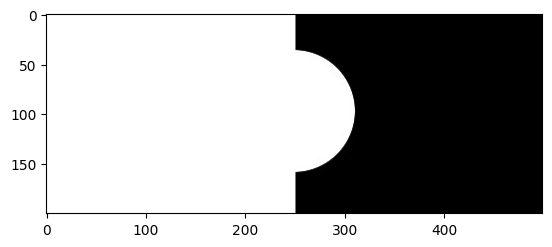

In [56]:
result=cv2.bitwise_or(img_rec,img_cir,mask=None)
plt.imshow(result,cmap="gray")

**Bitwise XOR Operator**



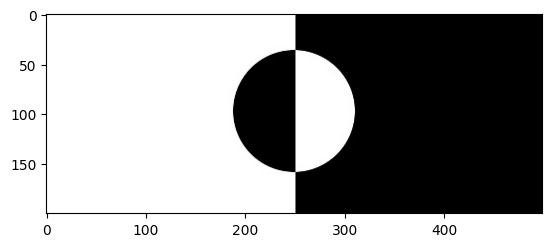

In [57]:
result=cv2.bitwise_xor(img_rec,img_cir,mask=None)
plt.imshow(result,cmap="gray")

# **Application: Logo Manipulation**

In this section we will learn how to fill in the white lettering of the Coca-Cola logo with a background image.

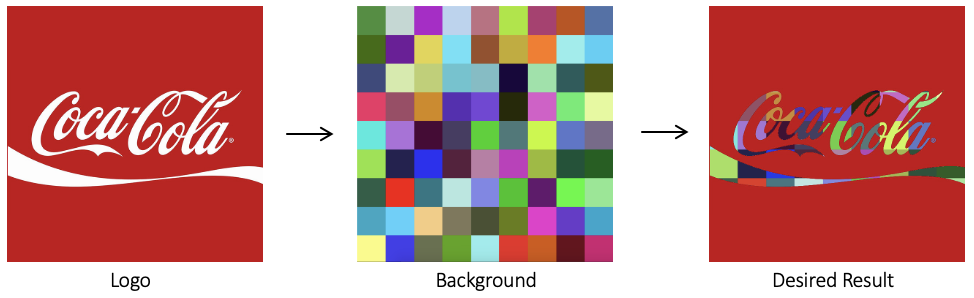

In [58]:
Image(filename='Logo_Manipulation.png')

**Read Foreground Image**

(700, 700, 3)


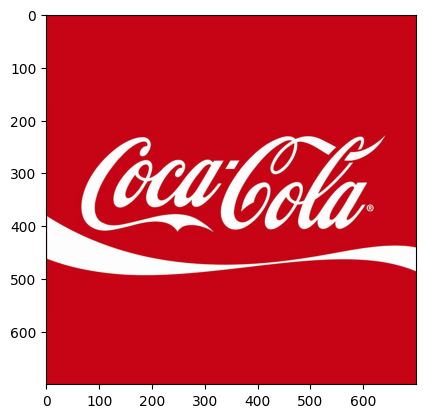

In [59]:
img_bgr=cv2.imread("coca-cola-logo.png")
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

print(img_rgb.shape)

logo_w=img_rgb.shape[0]
logo_h=img_rgb.shape[1]

**Read Background Image**

(700, 700, 3)


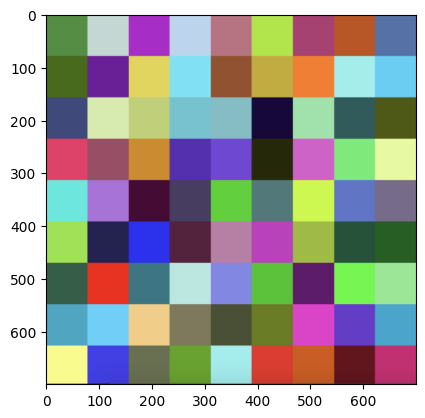

In [60]:
# Read in image of color checkboard background
img_background_bgr=cv2.imread("checkerboard_color.png")
img_background_rgb=cv2.cvtColor(img_background_bgr,cv2.COLOR_BGR2RGB)

# Set desired width (logo_w) and maintain image aspect ratio
aspect_ratio=logo_w/img_background_rgb.shape[1]
dim=(logo_w,int(img_background_rgb.shape[0]*aspect_ratio))

# Resize background image to sae size as logo image
img_background_rgb=cv2.resize(img_background_rgb,dim,interpolation=cv2.INTER_AREA)
plt.imshow(img_background_rgb)
print(img_background_rgb.shape)


**Create Mask for original image**
>Masking lets us select ONLY the part of the image we care about and ignore the rest.

(700, 700)


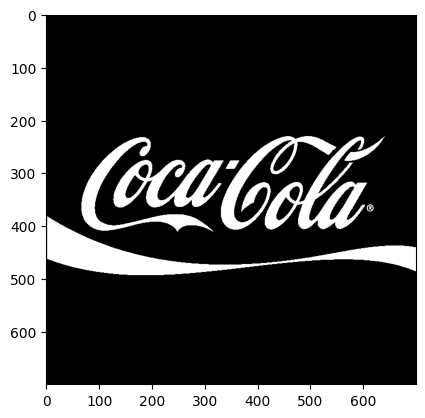

In [ ]:
# Convert logo to gray scale
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)

# Apply global threshold to creat a binary mask of logo
retval,img_mask=cv2.threshold(img_gray,127,225,cv2.THRESH_BINARY)

plt.imshow(img_mask,cmap="gray")
print(img_mask.shape)

**Invert the Mask for background**

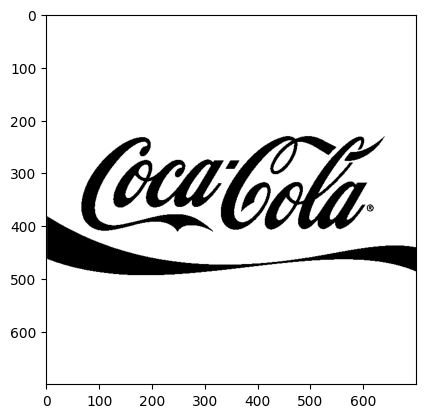

In [74]:
img_mask_inv=cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv,cmap="gray")

**Apply background on the mask / (Remove text area)**

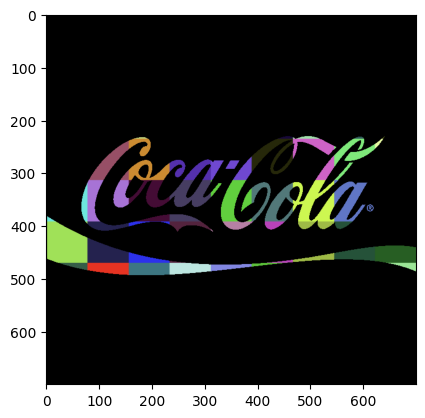

In [79]:
# Create colorful background "behind" the logo lettering)
img_background=cv2.bitwise_and(img_background_rgb,img_background_rgb,mask=img_mask_inv)
plt.imshow(img_background)

**Isolate foreground from image / (keep text only)**

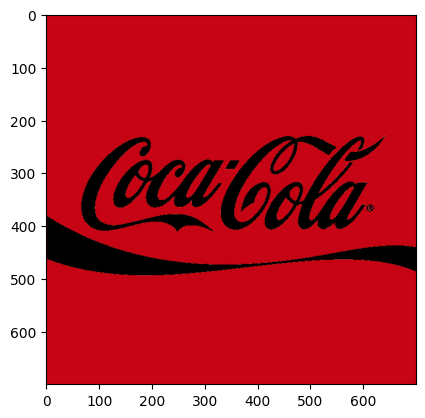

In [80]:
# Isolate foreground (red from original image) using the inverse mask
img_foreground=cv2.bitwise_and(img_rgb,img_rgb,mask=img_mask)
plt.imshow(img_foreground)

**Result: Merge Foreground and Background**

True

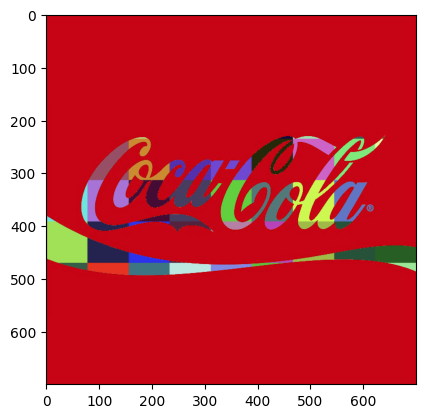

In [81]:
result=cv2.add(img_background,img_foreground)
plt.imshow(result)
cv2.imwrite("logo_final.png",result[:,:,::-1])